In [1]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Adding a global pooling layer to reduce feature dimensions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Assuming `base_model` is your loaded pretrained model without top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # This layer will average out the spatial dimensions
model = Model(inputs=base_model.input, outputs=x)

# Now `model` will output 2D features instead of 4D

# Prepare your data generators
data_gen = ImageDataGenerator(rescale=1./255)
generator = data_gen.flow_from_directory(
    '/Users/krishna/Semester2/GWAR/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for feature extraction: keeps data in order
)

# Extract features
features = model.predict(generator, steps=len(generator))

Found 6160 images belonging to 6 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step


In [2]:
# Assuming labels are one-hot encoded and you want to keep it that way
labels = generator.classes


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

ann = Sequential([
    Dense(512, activation='relu', input_dim=features.shape[1]),  # input dimension based on the features
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(generator.num_classes, activation='softmax')  # output layer with softmax for multi-class classification
])

ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Continue with training as before
history = ann.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8121 - loss: 0.6351 - val_accuracy: 0.9615 - val_loss: 0.1260
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9383 - loss: 0.1925 - val_accuracy: 0.9838 - val_loss: 0.0526
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9618 - loss: 0.1059 - val_accuracy: 0.9757 - val_loss: 0.0587
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9665 - loss: 0.0892 - val_accuracy: 0.9919 - val_loss: 0.0321
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9745 - loss: 0.0724 - val_accuracy: 0.9777 - val_loss: 0.0588
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9813 - loss: 0.0512 - val_accuracy: 0.9899 - val_loss: 0.0305
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9857 - loss: 0.0497 - val_accuracy: 0.9919 - val_loss: 0.0343
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9798 - loss: 0.0584 - val_accuracy: 0.

In [7]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=generator.num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=generator.num_classes)

# Recompile the model (if necessary)
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with one-hot encoded labels
history = ann.fit(X_train, y_train_one_hot, epochs=20, batch_size=32, validation_split=0.1)



Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9871 - loss: 0.0383 - val_accuracy: 0.9919 - val_loss: 0.0737
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9849 - loss: 0.0501 - val_accuracy: 0.9939 - val_loss: 0.0652
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9917 - loss: 0.0458 - val_accuracy: 0.9899 - val_loss: 0.0607
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9944 - loss: 0.0170 - val_accuracy: 0.9939 - val_loss: 0.0669
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9949 - loss: 0.0115 - val_accuracy: 0.9899 - val_loss: 0.0751
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9957 - loss: 0.0154 - val_accuracy: 0.9919 - val_loss: 0.0385
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9958 - loss: 0.0150 - val_accuracy: 0.9838 - val_loss: 0.0931
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9938 - loss: 0.0222 - val_accuracy: 0.

In [8]:
print("Shape of y_train:", y_train.shape)  # Should be (samples,) for sparse_categorical_crossentropy
print("Shape of y_train_one_hot:", y_train_one_hot.shape)  # Should be (samples, num_classes) for categorical_crossentropy


Shape of y_train: (4928,)
Shape of y_train_one_hot: (4928, 6)


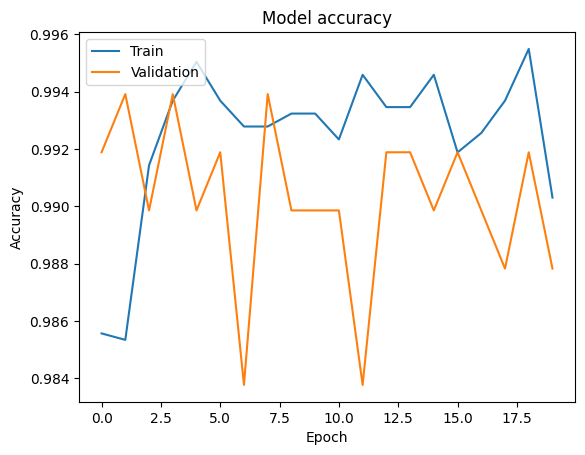

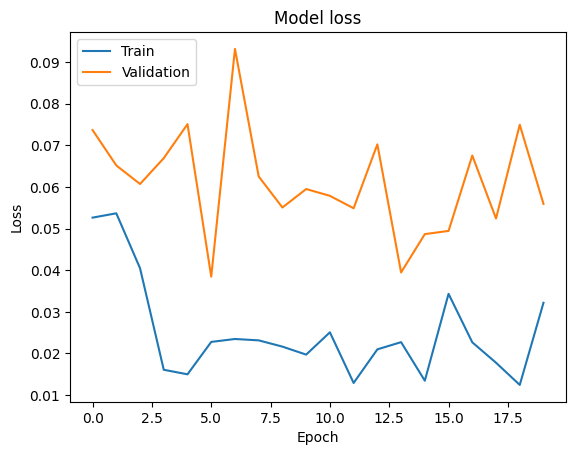

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [11]:
from tensorflow.keras.utils import to_categorical

# Assuming `generator.num_classes` is defined and correct
y_test_one_hot = to_categorical(y_test, num_classes=generator.num_classes)

# Now evaluate using the one-hot encoded labels
test_loss, test_accuracy = ann.evaluate(X_test, y_test_one_hot)
print("Test accuracy:", test_accuracy)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.9952 - loss: 0.0236
Test accuracy: 0.9918830990791321


In [12]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model again (this step is necessary because the model needs to be recompiled)
history = ann.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = ann.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)


Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9925 - loss: 0.0204 - val_accuracy: 0.9939 - val_loss: 0.1040
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9970 - loss: 0.0104 - val_accuracy: 0.9939 - val_loss: 0.0741
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9921 - loss: 0.0322 - val_accuracy: 0.9919 - val_loss: 0.0669
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9927 - loss: 0.0240 - val_accuracy: 0.9899 - val_loss: 0.0715
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9923 - loss: 0.0226 - val_accuracy: 0.9919 - val_loss: 0.0606
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.0140 - val_accuracy: 0.9919 - val_loss: 0.0729
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9906 - loss: 0.0283 - val_accuracy: 0.9899 - val_loss: 0.1249
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9930 - loss: 0.0288 - val_accuracy: 0.

In [13]:
print("Shape of y_train:", y_train.shape)  # Check the shape
print("First few y_train labels:", y_train[:5])  # Print first few labels


Shape of y_train: (4928,)
First few y_train labels: [4 0 2 0 2]


In [5]:
history = ann.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 6)